In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import yfinance as yf


In [ ]:
# Load AAPL data using yfinance
aapl_data = yf.download('AAPL', start='2010-01-01', end='2025-01-01')

# Use 'Adj Close' as it's adjusted for splits and dividends
aapl_data = aapl_data['Close']



[*********************100%***********************]  1 of 1 completed


In [ ]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] > 0.05:
        print("The series is non-stationary (fail to reject H0).")
    else:
        print("The series is stationary (reject H0).")

# Apply the ADF test
adf_test(aapl_data)


ADF Statistic: 1.7035842259184872
p-value: 0.9981373297781663
Critical Values: {'1%': -3.4320926833394925, '5%': -2.86231002141224, '10%': -2.5671798929611827}
The series is non-stationary (fail to reject H0).


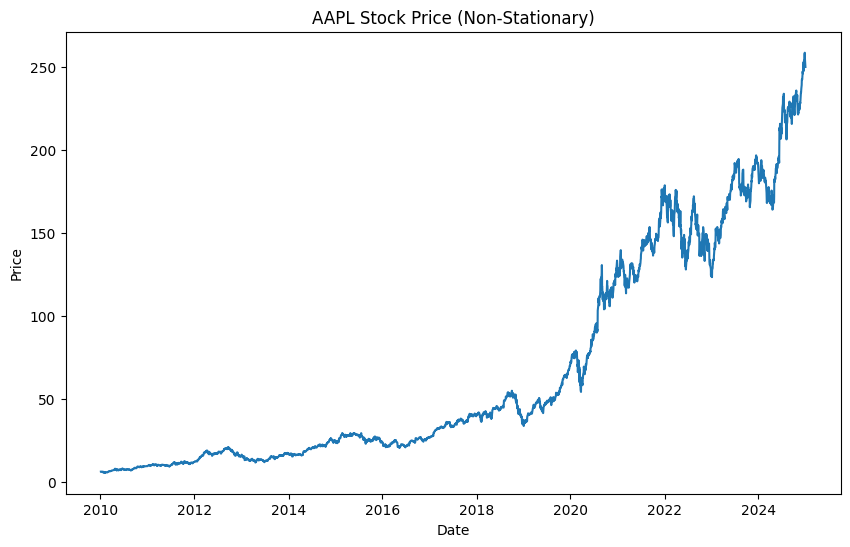

In [ ]:
# Plot the data if it's non-stationary
plt.figure(figsize=(10, 6))
plt.plot(aapl_data)
plt.title("AAPL Stock Price (Non-Stationary)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [ ]:
# First differencing to make the data stationary
aapl_diff = aapl_data.diff().dropna()

# Check the ADF test again after differencing
adf_test(aapl_diff)


ADF Statistic: -14.230221649441901
p-value: 1.601320257073619e-26
Critical Values: {'1%': -3.4320926833394925, '5%': -2.86231002141224, '10%': -2.5671798929611827}
The series is stationary (reject H0).


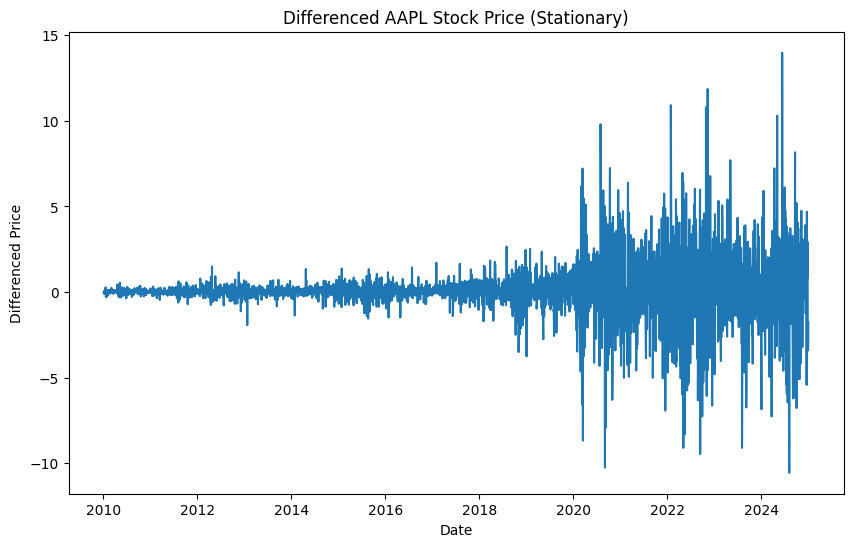

In [ ]:
# Plot the differenced data to see if it's stationary
plt.figure(figsize=(10, 6))
plt.plot(aapl_diff)
plt.title("Differenced AAPL Stock Price (Stationary)")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.show()


In [ ]:
# Check the first few rows and columns of the dataset
print(aapl_data.head())
print(aapl_data.columns)


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451467  6.487880  6.417460  6.458087  601904800
2010-01-06  6.348847  6.477046  6.342227  6.451467  552160000
2010-01-07  6.337111  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379240  6.379842  6.291368  6.328683  447610800
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
